In [1]:
import matplotlib.pyplot as plt
from Instruments import Keithley4200
import os

import time
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
KT4200 = Keithley4200(address = "TCPIP0::10.60.5.103::1225::SOCKET")
KT4200.InstInit()

KT4200.sample = "TestFastPulse"         # Sample name
KT4200.cell = 'Test'           # Measured cell
KT4200.savepath = "Test"       # Folder name (automatically created if not existing)
KT4200.lab = 'INRiM4200'       # Lab and instrument of measurement execution
KT4200.script = 'Test_fast_pulse_v2'

Keithley4200 session opened at address TCPIP0::10.60.5.103::1225::SOCKET


In [3]:
# Generate an array of alternated 1E-05 and 1E-07 values for a total of 82 values

KT4200.pulses_number = 3
KT4200.v_bias_PMU = 0
KT4200.v_amp_PMU = 1

period = 10e-6
KT4200.pulse_width = period/2
KT4200.rising_time = period/50
ch_source = 1
ch_ground = 2

print(period)
print(1/period)
print(KT4200.rising_time)



1e-05
99999.99999999999
2.0000000000000002e-07


In [4]:


KT4200.PMUSquareGen()
KT4200.PMUInit()
KT4200.PMUExecute()
KT4200.dataInit()
KT4200.PMUGetData()


Measurement Complete.


In [5]:
a = KT4200.data
print(a)

           Time[s]  Voltage_prog[V]  Voltage_read[V]  Current[A]  \
0     0.000000e+00        -1.000000        -0.210005   -0.000091   
1     1.000000e-08        -1.000000        -0.219350   -0.000097   
2     2.000000e-08        -1.000000        -0.222944   -0.000101   
3     3.000000e-08        -1.000000        -0.221506   -0.000104   
4     4.000000e-08        -1.000000        -0.222944   -0.000104   
...            ...              ...              ...         ...   
3115  3.115000e-05        -0.578947         0.002769   -0.000044   
3116  3.116000e-05        -0.684211        -0.019515   -0.000054   
3117  3.117000e-05        -0.789474        -0.039642   -0.000064   
3118  3.118000e-05        -0.894737        -0.063363   -0.000074   
3119  3.119000e-05        -1.000000        -0.082053   -0.000074   

      Resistance[ohm] Temperature[K] TargetTemperature[K]  GNorm[G0]  
0        11022.988442            NaN                  NaN   1.170862  
1        10316.893707            NaN     

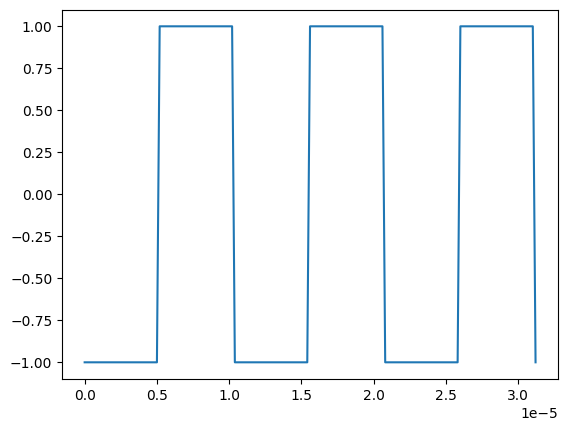

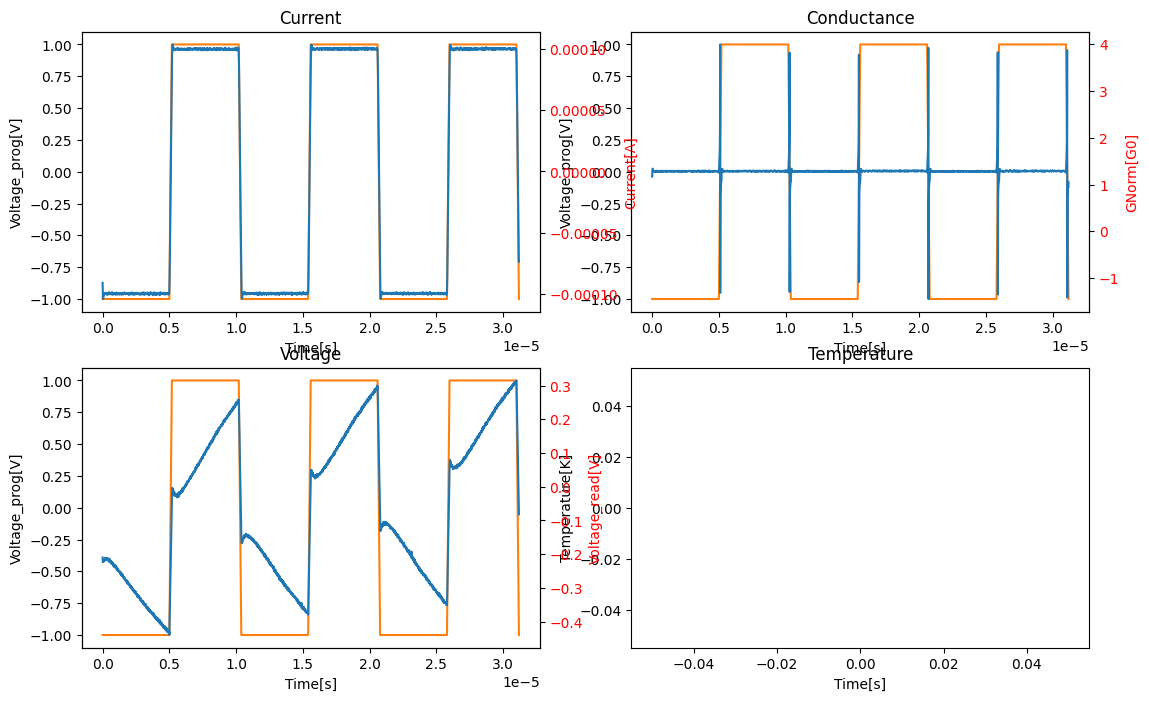

In [6]:
plt.plot(KT4200.data['Time[s]'],KT4200.data['Voltage_prog[V]'])
KT4200.PMUplot()

In [7]:

# Convert 'Voltage', 'Current', and 'Timestamp' columns to appropriate types
df_all_channels['Voltage'] = df_all_channels['Voltage'].astype(float)
df_all_channels['Current'] = df_all_channels['Current'].astype(float)
df_all_channels['Timestamp'] = df_all_channels['Timestamp'].astype(float)

df_all_channels_2['Voltage'] = df_all_channels_2['Voltage'].astype(float)
df_all_channels_2['Current'] = df_all_channels_2['Current'].astype(float)
df_all_channels_2['Timestamp'] = df_all_channels_2['Timestamp'].astype(float)

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Voltage on the left y-axis
ax1.plot(df_all_channels['Timestamp'], np.sign(df_all_channels['Voltage'])*KT4200.v_amp_PMU, color='b', label='Voltage')
ax1.set_xlabel('Timestamp (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Current
ax2 = ax1.twinx()
ax2.plot(df_all_channels_2['Timestamp'], -df_all_channels_2['Current'], color='r', label='Current')
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Voltage and Current vs Timestamp')
ax1.grid()

# Show the plot
plt.show()# Convert 'Voltage', 'Current', and 'Timestamp' columns to appropriate types
df_all_channels['Voltage'] = df_all_channels['Voltage'].astype(float)
df_all_channels['Current'] = df_all_channels['Current'].astype(float)
df_all_channels['Timestamp'] = df_all_channels['Timestamp'].astype(float)

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Voltage on the left y-axis
ax1.plot(df_all_channels_2['Timestamp'], df_all_channels_2['Voltage'], color='b', label='Voltage')
ax1.set_xlabel('Timestamp (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Current
ax2 = ax1.twinx()
ax2.plot(df_all_channels['Timestamp'], df_all_channels['Current'], color='r', label='Current')
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Voltage and Current vs Timestamp')
ax1.grid()

# Show the plot
plt.show()

# Convert columns to appropriate types, floating point for the voltage and current, and a string for the timestamp and status
df_all_channels = df_all_channels.astype({'Voltage': float, 'Current': float, 'Timestamp': str, 'Status': str})

# Save DataFrame to a CSV file
df_all_channels.to_csv('data_table.csv', index=False)
print("CSV file saved successfully.")  # Verify the data was saved

# Scatter plot with Voltage High and Current High on the plot, and all data in hover
fig = px.scatter(df_all_channels, x='Timestamp', y='Voltage',
                 title='PMU SEGARB COMPLETE',
                 labels={'Timestamp': 'Time Output (s)', 'Voltage': 'Voltage (V)'},
                 hover_data=["Timestamp", "Voltage"])

# Add a line trace
fig.add_trace(px.line(df_all_channels, x='Timestamp', y='Voltage').data[0])

# Set a linear x-axis
fig.update_xaxes(type='linear')

# Show the plot
fig.show()

NameError: name 'df_all_channels' is not defined

In [ ]:
KT4200.sourceOFF()

In [ ]:
KT4200.session.query(f"SS RP SMU{KT4200.ch_ground}, 2")
KT4200.session.query(f"SS RP SMU{KT4200.ch_source}, 2")

In [ ]:
#KT4200.query("DCL")

In [ ]:
#KT4200.SPol()
KT4200.closeSession()

In [ ]:
(float(df_all_channels['Timestamp'].iloc[-1])-float(df_all_channels['Timestamp'].iloc[0]))/len(df_all_channels['Timestamp'])
1/(np.mean(np.diff((df_all_channels['Timestamp'].astype(float)))))

In [ ]:
def create_waveform_dataframe(SEGTIME_str, STARTV_1_str, STOPV_1_str, dT):
    # Convert string inputs to numeric arrays
    SEGTIME = np.array([float(x) for x in SEGTIME_str.split(",")])
    STARTV_1 = np.array([float(x) for x in STARTV_1_str.split(",")])
    STOPV_1 = np.array([float(x) for x in STOPV_1_str.split(",")])

    time_points = []
    voltage_points = []

    current_time = 0

    for seg_time, start_v, stop_v in zip(SEGTIME, STARTV_1, STOPV_1):
        # Determine the number of steps in this segment
        num_steps = int(np.ceil(seg_time / dT))
        segment_times = current_time + np.arange(num_steps) * dT

        # Ensure the final segment time exactly matches the segment boundary
        if segment_times[-1] < current_time + seg_time:
            segment_times = np.append(segment_times, current_time + seg_time)

        # Generate linearly spaced voltages for this segment
        segment_voltages = np.linspace(start_v, stop_v, len(segment_times))

        time_points.extend(segment_times)
        voltage_points.extend(segment_voltages)

        current_time += seg_time

    waveform_df = pd.DataFrame({"Time": time_points, "Voltage": voltage_points})
    return waveform_df

dT = 1e-9

waveform_df = create_waveform_dataframe(SEGTIME, STARTV_1, STOPV_1, dT)
print(waveform_df)

plt.plot(waveform_df['Time'],waveform_df['Voltage'])

In [ ]:
df_all_channels['Timestamp'].iloc[-1]